# Wisconsin (Reducción dimensionalidad)

In [ ]:
!pip install -r requirements.txt


In [287]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px

#PCA
from sklearn.preprocessing import StandardScaler, scale
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

#Factor Analysis
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

#Encoding
from sklearn.preprocessing import LabelEncoder

In [288]:
# Lectura de datos
wisconsin = pd.read_csv('C:\\Users\\monic\\OneDrive\\DATASCIENCE - UCM\\07_MINERIADATOS_20230109\\DATOS\\wisconsin.csv')
wisconsin

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0       842302         M       17.990         10.38          122.80   
1       842517         M       20.570         17.77          132.90   
2     84300903         M       19.690         21.25          130.00   
3     84348301         M       11.420         20.38           77.58   
4     84358402         M       20.290         14.34          135.10   
5       843786         M       12.450         15.70           82.57   
6       844359         M       18.250         19.98          119.60   
7     84458202         M       13.710         20.83           90.20   
8       844981         M       13.000         21.82           87.50   
9     84501001         M       12.460         24.04           83.97   
10      845636         M       16.020         23.24          102.70   
11    84610002         M       15.780         17.89          103.60   
12      846226         M       19.170         24.80          132.40   
13      846381         M       15.850         23.95          103.70   
14    84667401         M       13.730         22.61           93.60   
15    84799002         M       14.540         27.54           96.73   
16      848406         M       14.680         20.13           94.74   
17    84862001         M       16.130         20.68          108.10   
18      849014         M       19.810         22.15          130.00   
19     8510426         B       13.540         14.36           87.46   
20     8510653         B       13.080         15.71           85.63   
21     8510824         B        9.504         12.44           60.34   
22     8511133         M       15.340         14.26          102.50   
23      851509         M       21.160         23.04          137.20   
24      852552         M       16.650         21.38          110.00   
25      852631         M       17.140         16.40          116.00   
26      852763         M       14.580         21.53           97.41   
27      852781         M       18.610         20.25          122.10   
28      852973         M       15.300         25.27          102.40   
29      853201         M       17.570         15.05          115.00   
30      853401         M       18.630         25.11          124.80   
31      853612         M       11.840         18.70           77.93   
32    85382601         M       17.020         23.98          112.80   
33      854002         M       19.270         26.47          127.90   
34      854039         M       16.130         17.88          107.00   
35      854253         M       16.740         21.59          110.10   
36      854268         M       14.250         21.72           93.63   
37      854941         B       13.030         18.42           82.61   
38      855133         M       14.990         25.20           95.54   
39      855138         M       13.480         20.82           88.40   
40      855167         M       13.440         21.58           86.18   
41      855563         M       10.950         21.35           71.90   
42      855625         M       19.070         24.81          128.30   
43      856106         M       13.280         20.28           87.32   
44    85638502         M       13.170         21.81           85.42   
45      857010         M       18.650         17.60          123.70   
46    85713702         B        8.196         16.84           51.71   
47       85715         M       13.170         18.66           85.98   
48      857155         B       12.050         14.63           78.04   
49      857156         B       13.490         22.30           86.91   
50      857343         B       11.760         21.60           74.72   
51      857373         B       13.640         16.34           87.21   
52      857374         B       11.940         18.24           75.71   
53      857392         M       18.220         18.70          120.30   
54      857438         M       15.100         22.02           97.26   
55    85759902         B       11.52

Separamos objetivo e ID de las numéricas.

In [289]:
wisconsinnum = wisconsin.loc[:,['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']]
wisconsinnum


radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89          103.60      781.0          0.09710   
12        19.170         24.80          132.40     1123.0          0.09740   
13        15.850         23.95          103.70      782.7          0.08401   
14        13.730         22.61           93.60      578.3          0.11310   
15        14.540         27.54           96.73      658.8          0.11390   
16        14.680         20.13           94.74      684.5          0.09867   
17        16.130         20.68          108.10      798.8          0.11700   
18        19.810         22.15          130.00     1260.0          0.09831   
19        13.540         14.36           87.46      566.3          0.09779   
20        13.080         15.71           85.63      520.0          0.10750   
21         9.504         12.44           60.34      273.9          0.10240   
22        15.340         14.26          102.50      704.4          0.10730   
23        21.160         23.04          137.20     1404.0          0.09428   
24        16.650         21.38          110.00      904.6          0.11210   
25        17.140         16.40          116.00      912.7          0.11860   
26        14.580         21.53           97.41      644.8          0.10540   
27        18.610         20.25          122.10     1094.0          0.09440   
28        15.300         25.27          102.40      732.4          0.10820   
29        17.570         15.05          115.00      955.1          0.09847   
30        18.630         25.11          124.80     1088.0          0.10640   
31        11.840         18.70           77.93      440.6          0.11090   
32        17.020         23.98          112.80      899.3          0.11970   
33        19.270         26.47          127.90     1162.0          0.09401   
34        16.130         17.88          107.00      807.2          0.10400   
35        16.740         21.59          110.10      869.5          0.09610   
36        14.250         21.72           93.63      633.0          0.09823   
37        13.030         18.42           82.61      523.8          0.08983   
38        14.990         25.20           95.54      698.8          0.09387   
39        13.480         20.82           88.40      559.2          0.10160   
40        13.440         21.58           86.18      563.0          0.08162   
41        10.950         21.35           71.90      371.1          0.12270   
42        19.070         24.81          128.30     1104.0          0.09081   
43        13.280         20.28           87.32      545.2          0.10410   
44        13.170         21.81           85.42      531.5          0.09714   
45        18.650         17.60          123.70     1076.0          0.10990   
46         8.196         16.84           51.71      201.9          0.08600   
47        13.170         18.66           85.98      534.6          0.11580   
48        12.050         14.63           78.04      449.3          0.10310   
49        13.490         22.30           86.91      561.0          0.08752   
50        11.760         21

Para realiza el análisis de reducción de dimensiones, estudiamos previamente la adecuación muestral de los datos en cuanto a la estructura de correlación global de las variables. 
Para ello vamos a representar la matriz de correlaciones de la variables. Nos interesan valores correlacionados.

In [290]:
corr = wisconsinnum.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

Aquellos variables que estén altamente correlacioandas son las que se representan con color rojo. Podemos observar que `radius_mean`, `perimeter_mean`, `area_mean`, `radius_worst`, `perimeter_worst` y `area_worst` están altamente correlacionados entre ellas. El resto de variables no presentan correlaciones muy elevadas.

Como `diagnosis` se trata de una variable categórica, esto es, toma solamente 2 valores (es binaria), tendríamos que utilizar un modelo de regresión logística.  Se debe asignar un valor numérico a cada categoría, como por ejemplo: 'M' = 1 y 'B' = 0. No obstante, esto implica asumir que la distancia entre todas las categorías es la misma y que existe cierto orden entre ellas, lo que generalmente no tiene sentido. 

En este data las correlaciones son extremas. Por un lado, hay muchas variables muy correlacionadas entre sí (cercanas a 1), y eso sería como introducir en el modelo dos predictores exactamente iguales por lo que uno de ellos se podría convertir en NA. Por otro lado, hay otras variables que presentan una correlación de prácticamente 0 lo cual tampoco es bueno porque no tendrán capacidad predictiva. Por tanto, se trata de un modelo bastante "complicado" para poder hacer predicciones con regresión logística.

Para determinar el modelo adecuado en cuanto a predicción usaremos el test de esferidad de Barlett y el KMO.

1. **Test de esferidad de Bartlett**. Compara la matriz de correlaciones con una matriz identidad para extraer un p-valor.
H0: Matriz de correlaciones = Matriz identidad, por lo que nos interesa rechazarla.

In [291]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
calculate_bartlett_sphericity(wisconsinnum)


(39362.12084113157, 0.0)

Como el valor del estadístico de contraste es 39362,12 (muy elevado) y el p-valor es 0 < 0.05 rechazamos la hipótesis nula.

2. **KMO-MSA global y por variable**. Índice de adecuación muestral o de Kaiser-Meyer-Olkin para comparar la correlación observada entre pares de variables y sus correspondientes correlaciones parciales (una vez eliminado el efecto de otras variables presentes). Buscamos valores superiores a 0.5 y cuanto más cercanos a 1, mejor. 

In [292]:
from factor_analyzer.factor_analyzer import calculate_kmo
calculate_kmo(wisconsinnum)

(array([0.83463512, 0.64352613, 0.85334054, 0.86403253, 0.814716  ,
        0.87939755, 0.89192843, 0.90027723, 0.82510264, 0.83181381,
        0.83412178, 0.48458942, 0.84290718, 0.85199881, 0.64427854,
        0.8712978 , 0.82547994, 0.83516673, 0.5832182 , 0.81149623,
        0.82308704, 0.60329755, 0.88493799, 0.82044529, 0.75316064,
        0.85127714, 0.90222587, 0.89105242, 0.69074764, 0.81233969]),
 0.8322253094688876)

Me devuelve una solución por cada una de las variables. Y un KMO global (0,832) bastante bueno.
`Texture_mean`, `symmetry_se`, `texture_worst` y `symmetry_worst` no obtienen buenos resultados. Posiblemente el mejor modelo de predicción sería el que obtenemos descartando esas varibales, por tanto, nos planteamos eliminarlos del análisis.


In [293]:
from factor_analyzer.factor_analyzer import calculate_kmo
calculate_kmo(wisconsinnum)

calculate_kmo(wisconsinnum.drop(['texture_mean', 'symmetry_se','texture_worst','symmetry_worst'], axis=1))

(array([0.83009547, 0.84817868, 0.86254577, 0.80936013, 0.87405072,
        0.88681898, 0.89576779, 0.97754593, 0.81937908, 0.83279789,
        0.77331416, 0.83534274, 0.85918891, 0.65130833, 0.86196738,
        0.82120099, 0.8228639 , 0.79940476, 0.8208029 , 0.87928596,
        0.82085413, 0.75172856, 0.84159134, 0.89739736, 0.87854535,
        0.79357022]),
 0.8478694281830824)

Efectivamente el KMO global aumenta al eliminar estas variables. Incluso, teniendo en cuenta el Principio de Parsimonia, podríamos eliminar aquellas donde KMO < 0.80.

In [294]:
#escalamos datos porque unidades de medida diferentes

scaler = StandardScaler()
scaler.fit(wisconsinnum)
X = scaler.transform(wisconsinnum) 
pd.DataFrame(X)

0         1         2         3         4         5         6   \
0    1.097064 -2.073335  1.269934  0.984375  1.568466  3.283515  2.652874   
1    1.829821 -0.353632  1.685955  1.908708 -0.826962 -0.487072 -0.023846   
2    1.579888  0.456187  1.566503  1.558884  0.942210  1.052926  1.363478   
3   -0.768909  0.253732 -0.592687 -0.764464  3.283553  3.402909  1.915897   
4    1.750297 -1.151816  1.776573  1.826229  0.280372  0.539340  1.371011   
5   -0.476375 -0.835335 -0.387148 -0.505650  2.237421  1.244335  0.866302   
6    1.170908  0.160649  1.138125  1.095295 -0.123136  0.088295  0.300072   
7   -0.118517  0.358450 -0.072867 -0.218965  1.604049  1.140102  0.061026   
8   -0.320167  0.588830 -0.184080 -0.384207  2.201839  1.684010  1.219096   
9   -0.473535  1.105439 -0.329482 -0.509063  1.582699  2.563358  1.738872   
10   0.537556  0.919273  0.442011  0.406453 -1.017686 -0.713542 -0.700684   
11   0.469393 -0.325708  0.479082  0.358672  0.052642  0.471115  0.134849   
12   1.432201  1.282296  1.665360  1.331355  0.073992  2.680858  1.477729   
13   0.489274  1.084495  0.483201  0.363507 -0.878913 -0.078478  0.132840   
14  -0.112836  0.772668  0.067180 -0.217827  1.191289  2.368158  1.556825   
15   0.117215  1.919912  0.196105  0.011123  1.248222  1.045345  0.942887   
16   0.156977  0.195555  0.114137  0.084216  0.164372 -0.612909 -0.186433   
17   0.568798  0.323544  0.664438  0.409297  1.468835  1.854573  1.047093   
18   1.613970  0.665623  1.566503  1.720997  0.138753 -0.031099  0.742007   
19  -0.166799 -1.147162 -0.185728 -0.251957  0.101747 -0.436850 -0.278210   
20  -0.297446 -0.833008 -0.261106 -0.383638  0.792763  0.429422 -0.541362   
21  -1.313080 -1.593959 -1.302806 -1.083572  0.429819 -0.747086 -0.743748   
22   0.344426 -1.170433  0.433773  0.140814  0.778530  2.068725  1.492795   
23   1.997389  0.872732  1.863073  2.130548 -0.148044 -0.040575  0.262407   
24   0.716485  0.486439  0.742699  0.710203  1.120124  0.783815  0.799760   
25   0.855652 -0.672441  0.989840  0.733241  1.582699  2.335941  1.683630   
26   0.128576  0.521345  0.224115 -0.028694  0.643316  1.562720  0.674211   
27   1.273153  0.223480  1.241101  1.248876 -0.139504  0.042812  0.755818   
28   0.333066  1.391668  0.429654  0.220449  0.842579  1.238650  0.998129   
29   0.977778 -0.986595  0.948650  0.853831  0.150139  0.215270  0.124931   
30   1.278833  1.354435  1.352314  1.231812  0.714481  1.598728  1.796625   
31  -0.649623 -0.137215 -0.578271 -0.609460  1.034726  0.895628  0.414323   
32   0.821570  1.091476  0.858032  0.695130  1.660981  0.857725  1.919664   
33   1.460602  1.670916  1.480004  1.442275 -0.167259  1.280343  0.965486   
34   0.568798 -0.328035  0.619129  0.433188  0.543684  0.977120  0.585070   
35   0.742046  0.535307  0.746818  0.610375 -0.018523  0.554502  0.577537   
36   0.034851  0.565559  0.068416 -0.062255  0.133059  0.103456  0.541128   
37  -0.311646 -0.202373 -0.385500 -0.372831 -0.464730 -1.263703 -0.793214   
38   0.245021  1.375378  0.147089  0.124887 -0.177222 -1.005016 -0.813805   
39  -0.183840  0.356123 -0.147009 -0.272150  0.372887  0.400995  0.219721   
40  -0.195201  0.532980 -0.238451 -0.261342 -1.048999 -0.834452 -0.724413   
41  -0.902396  0.479458 -0.826648 -0.807125  1.874478  0.330874  0.195866   
42   1.403799  1.284623  1.496480  1.277317 -0.394988  2.172958  1.530460   
43  -0.240643  0.230461 -0.191495 -0.311967  0.550801  0.744016  0.121415   
44  -0.271884  0.586503 -0.269756 -0.350931  0.055489  0.006804 -0.077958   
45   1.284513 -0.393193  1.307005  1.197683  0.963560  1.217803  1.363478   
46  -1.684571 -0.570050 -1.658278 -1.288347 -0.737294 -0.851130 -0.915500   
47  -0.271884 -0.146523 -0.246689 -0.342115  1.383436  0.355511  0.424367   
48  -0.589980 -1.084331 -0.573740 -0.584717  0.479635 -0.254348 -0.287249   
49  -0.181000  0.700529 -0.208383 -0.267030 -0.629123 -0.518531 -0.518386   
50  -0.672344  0.537634 -0.710491 -0.645580 -0.710963 -1.036286 -0.906837   
51  -0.

##### Análisis de Componentes Principales (PCA)

Recurrimos al PCA para obtener la descomposición en valores singualres y el resultado de componentes para los datos.

In [295]:
pca = PCA() 
scores = pca.fit_transform(X)
pd.DataFrame(scores)

0          1          2         3         4         5         6   \
0     9.192837   1.948583  -1.123166  3.633731 -1.195110  1.411424  2.159370   
1     2.387802  -3.768172  -0.529293  1.118264  0.621775  0.028656  0.013358   
2     5.733896  -1.075174  -0.551748  0.912083 -0.177086  0.541452 -0.668166   
3     7.122953  10.275589  -3.232790  0.152547 -2.960878  3.053422  1.429911   
4     3.935302  -1.948072   1.389767  2.940639  0.546747 -1.226495 -0.936213   
5     2.380247   3.949929  -2.934877  0.941037 -1.056042 -0.451039  0.490445   
6     2.238883  -2.690031  -1.639913  0.149340  0.040360 -0.128948 -0.301567   
7     2.143299   2.340244  -0.871947 -0.127043 -1.427437 -1.257039  0.974100   
8     3.174924   3.391813  -3.119986 -0.601297 -1.522290  0.559545 -0.215104   
9     6.351747   7.727174  -4.341916 -3.375202  1.710263 -0.723909  2.519840   
10   -0.810414  -2.659275  -0.488830 -1.672567  0.275812  0.127332  0.625012   
11    2.651100   0.066568  -1.526455  0.051262  0.331951  0.764867  0.666092   
12    8.185034   2.700976   5.730231 -1.112257  1.043470  2.594571  0.941497   
13    0.342126  -0.968279   1.717172 -0.595003  0.468011  1.007660 -1.799081   
14    4.342379   4.861083  -2.816116 -1.454557  1.290063 -0.349716  0.742880   
15    4.075656   2.977061  -3.125274 -2.458071 -0.408342  0.495778  0.915057   
16    0.230055  -1.564758  -0.802519 -0.650583 -0.494711 -0.762191 -0.086847   
17    4.418011   1.418670  -2.270319 -0.186272 -1.423861 -0.752489  0.441985   
18    4.948704  -4.114334  -0.314749 -0.088207 -0.056715 -1.137689 -0.251283   
19   -1.237063  -0.188215  -0.593283  1.596346 -0.442154 -0.048637 -1.201687   
20   -1.578161   0.572808  -1.801447  1.125276 -0.395270  0.430841  0.338484   
21   -3.557336   1.662950   0.451187  2.073765 -0.490746 -0.770068 -0.191039   
22    4.733211   3.304964  -1.466537  2.041150 -0.026220  3.023044 -1.007180   
23    4.208524  -5.128367  -0.752402 -0.862710 -0.470968 -0.595840 -0.074828   
24    4.949632  -1.543752  -1.713194  0.046759 -1.739230 -0.812880  0.800305   
25    7.098563   2.018610  -0.029010  2.587951 -2.039340  1.184201  0.601854   
26    3.510263   2.171625  -3.894546 -1.295760 -0.068218  0.787357  0.289919   
27    3.064054  -1.876552   2.581748  0.128484 -0.116665 -0.907595 -0.645835   
28    4.007264   0.537242  -2.761626 -1.898388 -0.525673  0.192849  0.161130   
29    1.715310  -1.523705   0.146187  1.911386  0.536123  0.036260  0.184030   
30    6.059446  -0.757177  -0.349239 -1.064218 -0.746105  0.242080  0.461977   
31    2.902236   4.005296  -3.001462 -0.325316 -0.855356  1.234679  1.978088   
32    4.554783   0.337536  -0.754301 -0.700330 -1.548545 -0.191008 -0.889584   
33    4.990603  -1.132589  -2.577384 -1.217262  0.669915  0.267479  1.032617   
34    2.985341   0.758423  -3.493762  0.054260  0.167100  1.001787  0.770772   
35    2.766369  -0.354356  -1.896963 -0.534256 -0.884020  2.011036 -0.720595   
36    1.296199   0.913196  -1.575769 -1.043167  0.414722  0.568595 -0.142721   
37   -3.749313  -1.413473   1.732308 -0.565443  0.080339  0.290269 -0.805040   
38   -0.998069  -3.351293   4.305574 -0.561210 -0.464373 -1.494456  1.280255   
39    0.765264   0.886244  -2.704918 -0.274780  0.810429 -1.037351 -0.177724   
40   -2.150953  -1.923992  -1.180484 -1.113198  0.448472  0.929112  0.041873   
41   -0.093331   2.260752  -1.904726 -1.442307 -1.705364 -2.122638 -0.496979   
42    9.088000   2.018673   2.141226 -1.069244  0.797931  4.311094  0.434165   
43    0.990454   0.984930  -2.310734 -0.276826 -0.640511  0.242782  0.613773   
44   -0.293547  -0.137099  -3.301932 -1.009786 -0.022511  0.110146  0.233604   
45    5.380940  -0.134877  -1.678843  1.507695  0.151998  0.423905 -0.788175   
46   -4.581937   1.484220   0.042075  0.296229 -0.713853  0.575927  0.223202   
47    1.700007   2.352272  -3.078089 -0.066021 -1.056466 -0.282110 -0.160620   
48   -2.136445   0.095830  -1.492412  1.121063 -0.068037 -0.693492  0.197334   
49   -1.5674

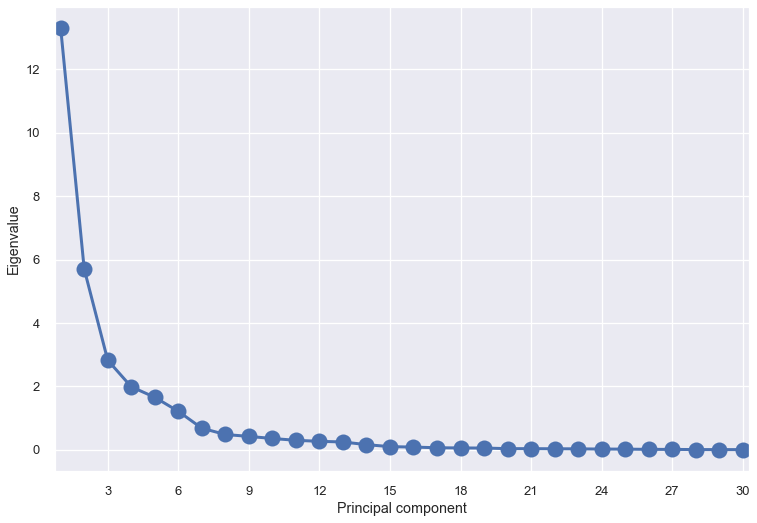

In [296]:
from psynlig import pca_scree
plt.style.use('seaborn-talk')

pca_scree(pca, marker='o', markersize=16, lw=3)

plt.show()

Como podemos observar en el gráfico, a partir de cierto número de componentes, la varianza del modelo no está explicada por estos. En este caso podríamos quedarnos con 6 componentes o por Principio de Parsimonia con 3.Veamos el aporte con otro gráfico.

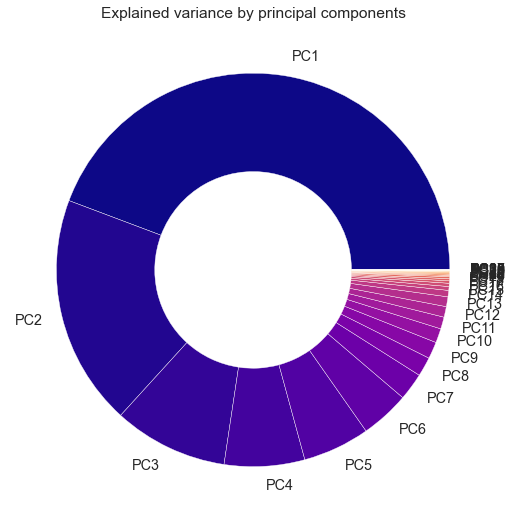

In [297]:
from psynlig import pca_explained_variance_pie
plt.style.use('seaborn-talk')

fig, axi = pca_explained_variance_pie(pca, cmap='plasma')
axi.set_title('Explained variance by principal components')

plt.show()

Podemos observar como las componentes 1, 2 y 3 captan la mayoría de la variabilidad.

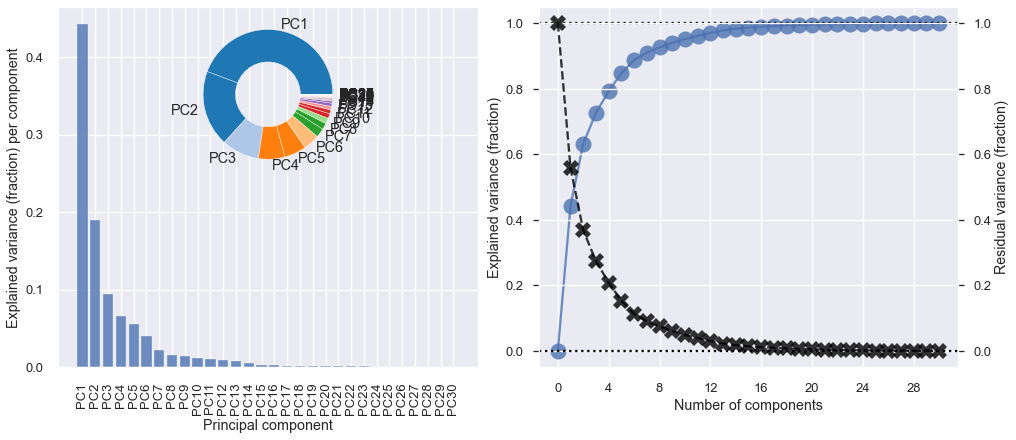

In [298]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from psynlig import (
    pca_explained_variance,
    pca_residual_variance,
    pca_explained_variance_bar,
    pca_explained_variance_pie,
    pca_1d_loadings,
    pca_2d_loadings,
    pca_2d_scores
)

fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2, figsize=(14, 6), constrained_layout=True
)
pca_explained_variance_bar(pca, axi=ax1, alpha=0.8)
pca_explained_variance(pca, axi=ax2, marker='o', markersize=16, alpha=0.8)
ax4 = ax2.twinx()
pca_residual_variance(
    pca,
    ax4,
    marker='X',
    markersize=16,
    alpha=0.8,
    color='black',
    linestyle='--'
)
ax3 = inset_axes(ax1, width='45%', height='45%', loc=9)
pca_explained_variance_pie(pca, axi=ax3, cmap='tab20')
plt.show()

Con las tres primeras componentes podemos explicar el 70% de la variabiliad del archivo (lo comprobaremos luego con la matriz de scores).A partir del sexto componente, la línea azul se empieza a aplanar por lo que no se mejora nada. La componente 1 explica casi el 50% de la variabilidad del archivo.

Calculamos la matriz de scores que enfrenta los registros de mi dataframe con los componentes sujeto en este caso a la variabilidad del 70%. Sabemos que son 3 componentes por el cálculo realizado antes. En este caso usamos el paquete pca y mostramos resultados con model.results. 

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [30] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


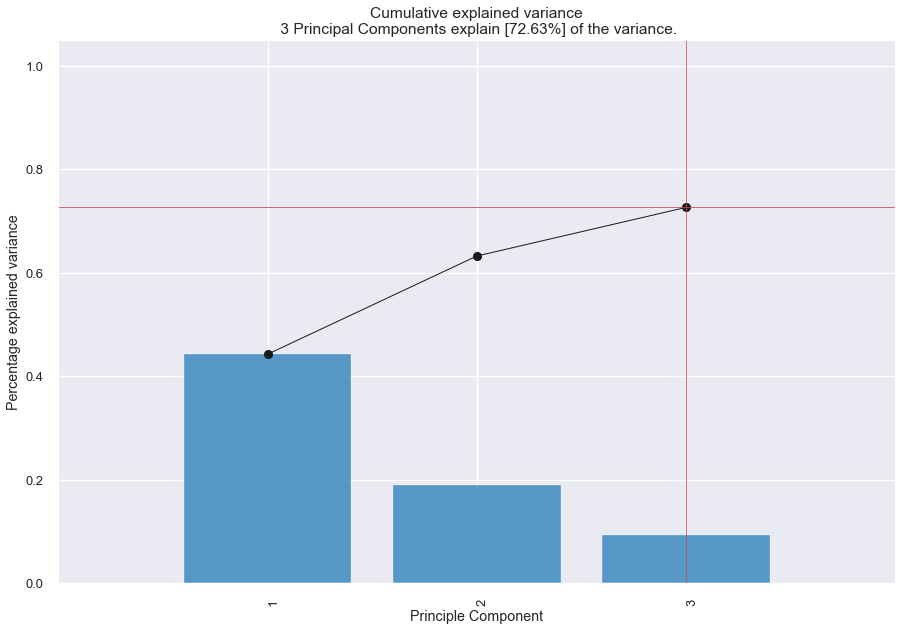

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 3 Principal Components explain [72.63%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 748.8x514.8 with 0 Axes>

In [299]:
from pca import pca

model = pca(normalize=True, n_components=3)
#usamos wisconsinum en vez de X para que nos de los nombres de los registros.
results = model.fit_transform(wisconsinnum)

model.plot() 

In [300]:
model.results['PC']

PC1        PC2        PC3
0     9.192837   1.948583  -1.123166
1     2.387802  -3.768172  -0.529293
2     5.733896  -1.075174  -0.551748
3     7.122953  10.275589  -3.232789
4     3.935302  -1.948072   1.389767
5     2.380247   3.949929  -2.934877
6     2.238883  -2.690031  -1.639913
7     2.143299   2.340244  -0.871947
8     3.174924   3.391813  -3.119986
9     6.351747   7.727174  -4.341916
10   -0.810414  -2.659275  -0.488830
11    2.651100   0.066568  -1.526455
12    8.185034   2.700976   5.730231
13    0.342126  -0.968279   1.717172
14    4.342379   4.861083  -2.816116
15    4.075656   2.977061  -3.125274
16    0.230055  -1.564758  -0.802519
17    4.418011   1.418670  -2.270319
18    4.948704  -4.114334  -0.314749
19   -1.237063  -0.188215  -0.593283
20   -1.578161   0.572808  -1.801447
21   -3.557336   1.662950   0.451188
22    4.733211   3.304964  -1.466537
23    4.208524  -5.128367  -0.752402
24    4.949632  -1.543752  -1.713194
25    7.098563   2.018610  -0.029010
26    3.510263   2.171625  -3.894546
27    3.064054  -1.876552   2.581748
28    4.007264   0.537242  -2.761626
29    1.715310  -1.523705   0.146187
30    6.059446  -0.757177  -0.349239
31    2.902236   4.005296  -3.001462
32    4.554783   0.337536  -0.754301
33    4.990603  -1.132589  -2.577384
34    2.985341   0.758423  -3.493762
35    2.766369  -0.354356  -1.896963
36    1.296199   0.913196  -1.575769
37   -3.749313  -1.413473   1.732308
38   -0.998069  -3.351293   4.305574
39    0.765264   0.886244  -2.704918
40   -2.150953  -1.923992  -1.180484
41   -0.093331   2.260752  -1.904727
42    9.088000   2.018673   2.141226
43    0.990454   0.984930  -2.310734
44   -0.293547  -0.137099  -3.301932
45    5.380940  -0.134877  -1.678843
46   -4.581937   1.484220   0.042075
47    1.700007   2.352272  -3.078089
48   -2.136445   0.095830  -1.492412
49   -1.567479  -1.208433  -0.369159
50   -3.542906  -1.282496   1.018211
51   -3.157814  -1.688959  -0.496294
52   -3.450489  -0.498219  -0.152518
53    3.302551  -1.130938   0.826393
54   -0.674619  -2.116410  -1.396220
55   -2.858158   0.152723   0.428935
56    4.648739  -2.310333  -0.728809
57    2.176863   0.972116  -1.943888
58   -3.721459  -1.787642   1.279933
59   -4.135963   2.403792  -1.242958
60   -2.385836   2.757658   1.214086
61   -2.578883   3.138672   1.400280
62    4.759112   3.011681  -0.166241
63   -2.314132   3.267990   2.796224
64    1.691608   1.540677  -1.799845
65    1.812305   0.722740  -1.466250
66   -2.785925   2.310649   0.472725
67   -3.518648  -0.658309   0.591375
68    4.330003   9.202526   1.492963
69   -3.261279  -0.937838   0.205130
70    2.704596  -4.437142   0.307345
71   -0.307856   7.387812   3.819086
72    5.503705   0.938325  -2.210132
73   -0.361709   0.119739  -2.040956
74   -2.629977  -0.697309  -0.583942
75    1.428168  -1.967101   1.111939
76   -0.834518   1.965605   0.790432
77    6.230897   0.920070   0.089827
78   11.668715   4.748617   2.005879
79   -2.021578  -0.254900  -0.647872
80   -1.638385   1.715949   0.434206
81    1.167462   2.514516  -1.905719
82   10.769243  -2.257983   0.038836
83    5.034811   0.774409   2.682338
84   -2.174464   0.496878  -0.949092
85    3.288235  -1.668237   0.146932
86    0.607608   0.162215   1.637375
87    3.583564  -2.206662  -1.704536
88   -0.934158   0.927701  -0.040164
89    1.259605   1.015577  -0.080593
90   -1.588264  -1.619657   0.309999
91    0.252498  -0.531352   0.589328
92   -2.847432  -2.893648   0.527989
93   -1.964950  -0.965157  -0.081208
94    2.775866   0.558001  -0.605771
95    4.396228  -2.123508   0.579510
96   -2.592083   0.213634   1.035612
97   -3.904338   1.190067   1.551981
98   -2.818231   0.367884  -1.351436
99    0.616281   0.638912  -0.199919
100  -0.432860  -1.392044  -0.082719
101  -4.555029   3.528786  -0.215264
102  -3.448184  -1.424622  -0.088724
103  -2.115960   1.849374  -0.556674
104  -2.691352   1.420062   0.969151
105   3.213917   4.046756  -2.715384
106  -0.749271   1.797639  -0.568366
107  -3.159006 

In [301]:
#Creamos nuevo dataframe para unirle posteriormente la variable objetivo diagnosis.
nuevomodelo = pd.DataFrame(model.results['PC'])
nuevomodelo

PC1        PC2        PC3
0     9.192837   1.948583  -1.123166
1     2.387802  -3.768172  -0.529293
2     5.733896  -1.075174  -0.551748
3     7.122953  10.275589  -3.232789
4     3.935302  -1.948072   1.389767
5     2.380247   3.949929  -2.934877
6     2.238883  -2.690031  -1.639913
7     2.143299   2.340244  -0.871947
8     3.174924   3.391813  -3.119986
9     6.351747   7.727174  -4.341916
10   -0.810414  -2.659275  -0.488830
11    2.651100   0.066568  -1.526455
12    8.185034   2.700976   5.730231
13    0.342126  -0.968279   1.717172
14    4.342379   4.861083  -2.816116
15    4.075656   2.977061  -3.125274
16    0.230055  -1.564758  -0.802519
17    4.418011   1.418670  -2.270319
18    4.948704  -4.114334  -0.314749
19   -1.237063  -0.188215  -0.593283
20   -1.578161   0.572808  -1.801447
21   -3.557336   1.662950   0.451188
22    4.733211   3.304964  -1.466537
23    4.208524  -5.128367  -0.752402
24    4.949632  -1.543752  -1.713194
25    7.098563   2.018610  -0.029010
26    3.510263   2.171625  -3.894546
27    3.064054  -1.876552   2.581748
28    4.007264   0.537242  -2.761626
29    1.715310  -1.523705   0.146187
30    6.059446  -0.757177  -0.349239
31    2.902236   4.005296  -3.001462
32    4.554783   0.337536  -0.754301
33    4.990603  -1.132589  -2.577384
34    2.985341   0.758423  -3.493762
35    2.766369  -0.354356  -1.896963
36    1.296199   0.913196  -1.575769
37   -3.749313  -1.413473   1.732308
38   -0.998069  -3.351293   4.305574
39    0.765264   0.886244  -2.704918
40   -2.150953  -1.923992  -1.180484
41   -0.093331   2.260752  -1.904727
42    9.088000   2.018673   2.141226
43    0.990454   0.984930  -2.310734
44   -0.293547  -0.137099  -3.301932
45    5.380940  -0.134877  -1.678843
46   -4.581937   1.484220   0.042075
47    1.700007   2.352272  -3.078089
48   -2.136445   0.095830  -1.492412
49   -1.567479  -1.208433  -0.369159
50   -3.542906  -1.282496   1.018211
51   -3.157814  -1.688959  -0.496294
52   -3.450489  -0.498219  -0.152518
53    3.302551  -1.130938   0.826393
54   -0.674619  -2.116410  -1.396220
55   -2.858158   0.152723   0.428935
56    4.648739  -2.310333  -0.728809
57    2.176863   0.972116  -1.943888
58   -3.721459  -1.787642   1.279933
59   -4.135963   2.403792  -1.242958
60   -2.385836   2.757658   1.214086
61   -2.578883   3.138672   1.400280
62    4.759112   3.011681  -0.166241
63   -2.314132   3.267990   2.796224
64    1.691608   1.540677  -1.799845
65    1.812305   0.722740  -1.466250
66   -2.785925   2.310649   0.472725
67   -3.518648  -0.658309   0.591375
68    4.330003   9.202526   1.492963
69   -3.261279  -0.937838   0.205130
70    2.704596  -4.437142   0.307345
71   -0.307856   7.387812   3.819086
72    5.503705   0.938325  -2.210132
73   -0.361709   0.119739  -2.040956
74   -2.629977  -0.697309  -0.583942
75    1.428168  -1.967101   1.111939
76   -0.834518   1.965605   0.790432
77    6.230897   0.920070   0.089827
78   11.668715   4.748617   2.005879
79   -2.021578  -0.254900  -0.647872
80   -1.638385   1.715949   0.434206
81    1.167462   2.514516  -1.905719
82   10.769243  -2.257983   0.038836
83    5.034811   0.774409   2.682338
84   -2.174464   0.496878  -0.949092
85    3.288235  -1.668237   0.146932
86    0.607608   0.162215   1.637375
87    3.583564  -2.206662  -1.704536
88   -0.934158   0.927701  -0.040164
89    1.259605   1.015577  -0.080593
90   -1.588264  -1.619657   0.309999
91    0.252498  -0.531352   0.589328
92   -2.847432  -2.893648   0.527989
93   -1.964950  -0.965157  -0.081208
94    2.775866   0.558001  -0.605771
95    4.396228  -2.123508   0.579510
96   -2.592083   0.213634   1.035612
97   -3.904338   1.190067   1.551981
98   -2.818231   0.367884  -1.351436
99    0.616281   0.638912  -0.199919
100  -0.432860  -1.392044  -0.082719
101  -4.555029   3.528786  -0.215264
102  -3.448184  -1.424622  -0.088724
103  -2.115960   1.849374  -0.556674
104  -2.691352   1.420062   0.969151
105   3.213917   4.046756  -2.715384
106  -0.749271   1.797639  -0.568366
107  -3.159006 

In [302]:
#Convertimos valores B en O y valores M en 1 de la variable objetivo.

wisconsin.diagnosis = wisconsin.diagnosis.replace({"M": 1, "B": 0})

wisconsin.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [303]:
#concatenamos variable objetivo con los PC.
nuevomodeloobj = pd.concat((wisconsin.diagnosis,nuevomodelo), axis=1)
nuevomodeloobj.head()

diagnosis       PC1        PC2       PC3
0          1  9.192837   1.948583 -1.123166
1          1  2.387802  -3.768172 -0.529293
2          1  5.733896  -1.075174 -0.551748
3          1  7.122953  10.275589 -3.232789
4          1  3.935302  -1.948072  1.389767

In [304]:
#Concatena todos los efectos de un dataset para generar la formula completa del tirón.
def ols_formula(df, dependent_var, *excluded_cols): 
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var) 
    for col in excluded_cols: 
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns) 


In [305]:
from sklearn.model_selection import train_test_split

varObjBin = wisconsin.diagnosis
X_train, X_test, y_train, y_test = train_test_split(nuevomodelo, varObjBin, test_size=0.2, random_state=1234)

#Genero training con objetivo dentro
data_train = X_train.join(y_train.astype('int64'))
data_test =  X_test.join(y_test.astype('int64'))

#Aplicamos fórmula al modelo
formC=ols_formula(data_train,'diagnosis')
formC



'diagnosis ~ PC1 + PC2 + PC3'

In [306]:
#Importamos API para fórmulas
from statsmodels.formula.api import logit

#Ajusto regresión de ejemplo
modeloC = logit(formC, data=data_train).fit()
modeloC.summary()

Optimization terminated successfully.
         Current function value: 0.081726
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                          Logit   Df Residuals:                      451
Method:                           MLE   Df Model:                            3
Date:                Fri, 10 Mar 2023   Pseudo R-squ.:                  0.8757
Time:                        13:02:14   Log-Likelihood:                -37.185
converged:                       True   LL-Null:                       -299.10
Covariance Type:            nonrobust   LLR p-value:                3.276e-113
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1188      0.342     -3.271      0.001      -1.789      -0.448
PC1            2.9671      0.520      5.709      0.000       1.948       3.986
PC2           -1.4898      0.306     -4.861      0.000      -2.090      -0.889
PC3           -0.5897      0.171     -3.448      0.001      -0.925      -0.255
==============================================================================

Possibly complete quasi-separation: A fraction 0.44 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

A diferencia de los modelos de regresión lineal, en los modelos logísticos no existe un equivalente a R2  que determine exactamente la varianza explicada por el modelo. Se utiliza, en este caso, el pseudoR2 que intentan aproximarse al concepto de  R2 pero que, aunque su rango oscila entre 0 y 1, no se pueden considerar equivalentes. En este modelo el pseudoR2 es 0,875, por tanto, podemos concluir que se trata de un buen ajuste, los PC explican bien la variabilidad de "diagnosis". No obstante, el modelo presenta problemas de especificación porque el intervalo de confianza es muy grande. Así mismo, este IC no incluye el 0 por lo que existe significación paramétrica. Además, se rechaza la H0 en los 3 PC ya que p-valor < 0.05 en los 3 casos.

En cuanto a PC1 comentar que tiene una influencia positiva y significativa sobre 'diagnosis'. Específicamente, al dejar todas las variables constantes, una unidad adicional de diagnosis, provoca que los odds de PC1 se vean multiplicados por e^2.9671 = 19.435, lo que es lo mismo, aumenta en promedio los odds de PC1 en un 296%. 

No obstante, haremos validación cruzada porque con tr-test estamos expuestos a la aleatoriedad de la selección de la partición.

In [307]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

def cross_val_log(formula, data, seed=12345):
    # Generamos las matrices de diseño según la fórmula de modelo completo
    y, X = patsy.dmatrices(formula, data, return_type='dataframe')
    y = y.iloc[:,0].ravel()
      
    model = LogisticRegression(solver='lbfgs', max_iter=1000, penalty='none')
  
    # Establecemos esquema de validación fijando random_state (reproducibilidad)
    cv = RepeatedKFold(n_splits=5, n_repeats=20, random_state=seed)
      
    # Obtenemos los resultados de R2 para cada partición tr-tst
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv)
  
    # Sesgo y varianza
    print('Modelo: ' + formula)
    print('AUC: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
      
    #sns.violinplot(y=scores,palette='viridis')
      
    return(scores)

In [308]:
# Aplicacion a la fórmula completa. 

wisconsin.diagnosis = wisconsin.diagnosis.astype('int64')
cross_val_log(formC,data=nuevomodeloobj)

Modelo: diagnosis ~ PC1 + PC2 + PC3
AUC: 0.990 (0.007)


array([0.98048942, 0.98742378, 0.99874411, 0.99933862, 0.98420374,
       0.97248608, 0.99404762, 0.99475925, 0.99459459, 0.99176548,
       0.99364878, 0.99555414, 0.98279221, 0.99285714, 0.99236948,
       0.98946999, 1.        , 0.98081841, 0.98711755, 0.99661247,
       0.99532242, 0.99041005, 0.98930839, 0.97634271, 0.99731724,
       0.96683761, 0.99587171, 0.9982906 , 0.99007937, 0.99575163,
       0.99264952, 0.99425676, 0.99772727, 0.98398744, 0.9845614 ,
       0.99669118, 0.98360656, 0.99066023, 0.98630137, 0.9961885 ,
       0.99120879, 0.98196457, 0.99715909, 0.99227799, 0.99583333,
       0.98735043, 0.98986486, 0.99577922, 0.98649584, 0.99525617,
       0.99222973, 0.98084772, 0.99902597, 0.99403299, 0.98457411,
       0.99875   , 0.97262197, 0.99558824, 0.99162641, 0.99059053,
       0.99726496, 0.99737963, 0.9909375 , 0.98974359, 0.98170732,
       0.99487179, 0.99465812, 0.9903517 , 0.98344595, 0.99188838,
       0.99424552, 0.99473499, 0.99565653, 0.98153846, 0.98596

Me devuelve la fórmula del modelo, media área por debajo de la curva ROC (0.990) y desvest (0.007). Creamos una lista de fórmulas y aplicamos de forma general la comparativa por VC sin interacciones.

In [309]:
# Creamos lista de fórmulas con PC1.
formC
form1 = 'diagnosis ~ PC1 + PC2'
form2 = 'diagnosis ~ PC1'
form3 = 'diagnosis ~ PC1 + PC3'

#ya sabemos que el modelo PC1 debe estar presente en el modelo por lo que no contemplamos modelos sin el.

list_form = [formC,form1,form2,form3]

# Aplicamos a toda la lista la función creada (devuelve un dataframe pero está transpuesto)
list_res = pd.DataFrame(map(lambda x: cross_val_log(x,nuevomodeloobj, seed=2022),list_form))

Modelo: diagnosis ~ PC1 + PC2 + PC3
AUC: 0.990 (0.007)
Modelo: diagnosis ~ PC1 + PC2
AUC: 0.989 (0.007)
Modelo: diagnosis ~ PC1
AUC: 0.970 (0.012)
Modelo: diagnosis ~ PC1 + PC3
AUC: 0.971 (0.012)


Como podemos obvservar el modelo completo es el que mayor AUC nos devuelve y menor desviación típica. Vamos a arreglar el dataset para poder pintarlo.

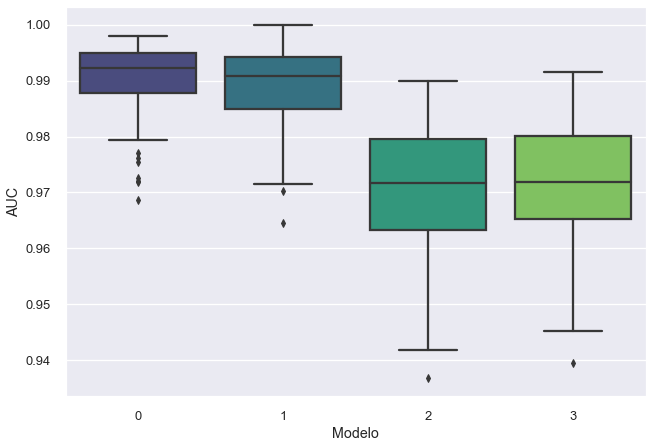

In [310]:
# Transponer dataframe y pasar de wide a long (creando un factor variable con el nombre de cada fórmula de la lista[0,1,2,3])

results = list_res.T.melt()
results.columns = ['Modelo','AUC']
results.head()

# Boxplot paralelo para comparar todas los modelos.
plt.clf()
sns.boxplot(x='Modelo',y='AUC',data=results,palette='viridis')
plt.show()

Los 4 son modelos muy buenos pero los dos primeros destacan sobre los segundos (modelo completo y modelo PC1+PC2). No obstante, el primer modelo presenta mayor AUC aunque el segundo es el preferido según el Principio de Parsimonia ante igual desviación típica ya que tiene 2 componentes solamente.